# World Carbon Dioxide Emission Data Analysis

### Import required Python Packages

In [1]:
import pandas as pd               # pandas is a dataframe library
import matplotlib.pyplot as plt   # plots the data
import numpy as np                # provides N-dim object support

# do plotting inline instead of in a separate window
%matplotlib inline

### Declare the header list

In [126]:
data_cols = ['entity', 'code', 'year', 'volume']

### Load the feed file

In [127]:
df = pd.read_csv('annual-co-emissions-by-region.csv', sep=',', names=data_cols, skiprows = 1)

In [128]:
df.shape

(2915, 4)

### Validate the Feed file contents

In [5]:
df.dtypes

entity     object
code       object
year        int64
volume    float64
dtype: object

In [6]:
df.describe()

,year,volume
count,2915.000000,2915.000000
mean,1883.000000,0.518617
std,76.511491,1.169099
min,1751.000000,-0.199648
25%,1817.000000,0.000000
50%,1883.000000,0.006022
75%,1949.000000,0.360649
max,2015.000000,10.300347


In [7]:
df.count()

entity    2915
code       795
year      2915
volume    2915
dtype: int64

In [8]:
df.head(5)

,entity,code,year,volume
0,Africa,NaN,1751,0.0
1,Africa,NaN,1752,0.0
2,Africa,NaN,1753,0.0
3,Africa,NaN,1754,0.0
4,Africa,NaN,1755,0.0


In [9]:
df.tail(5)

,entity,code,year,volume
2910,United States,USA,2011,5.294008
2911,United States,USA,2012,5.123625
2912,United States,USA,2013,5.163382
2913,United States,USA,2014,5.258578
2914,United States,USA,2015,5.101191


In [10]:
df[["entity","year","volume"]].head()

,entity,year,volume
0,Africa,1751,0.0
1,Africa,1752,0.0
2,Africa,1753,0.0
3,Africa,1754,0.0
4,Africa,1755,0.0


In [11]:
df[0:1] # this is of type DataFrame

,entity,code,year,volume
0,Africa,NaN,1751,0.0


In [12]:
df.iloc[0] # this is of type Series

entity    Africa
code         NaN
year        1751
volume         0
Name: 0, dtype: object

In [13]:
df.iloc[[0]] # this is of type DataFrame

,entity,code,year,volume
0,Africa,NaN,1751,0.0


### Data Analysis

In [14]:
df["volume"].isnull().values.any()

False

In [15]:
df["entity"].isnull().values.any()

False

In [16]:
df["year"].isnull().values.any()

False

In [17]:
df["code"].isnull().values.any()

True

In [18]:
df.isnull().values.any()

True

In [19]:
df.corr()

,year,volume
year,1.000000,0.562546
volume,0.562546,1.000000


In [20]:
df.groupby("entity").agg("max")

,code,year,volume
entity,,,
Africa,NaN,2015,1.315140
Americas (other),NaN,2015,2.374589
Asia and Pacific (other),NaN,2015,4.937293
China,CHN,2015,10.300347
EU-28,NaN,2015,4.405516
Europe (other),NaN,2015,4.611828
India,IND,2015,2.278054
International aviation and maritime transport,NaN,2015,1.146747
Middle East,NaN,2015,2.647512


In [39]:
df[df["volume"] != 0].sort_values("volume").head()

,entity,code,year,volume
2612,Statistical difference,NaN,1978,-0.199648
2580,Statistical difference,NaN,1946,-0.158750
2558,Statistical difference,NaN,1924,-0.117990
2574,Statistical difference,NaN,1940,-0.115480
2555,Statistical difference,NaN,1921,-0.112552


In [40]:
df[df["volume"] != 0].sort_values("volume").tail()

,entity,code,year,volume
1055,China,CHN,2011,9.741501
1056,China,CHN,2012,10.036778
1059,China,CHN,2015,10.232542
1057,China,CHN,2013,10.266399
1058,China,CHN,2014,10.300347


In [22]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

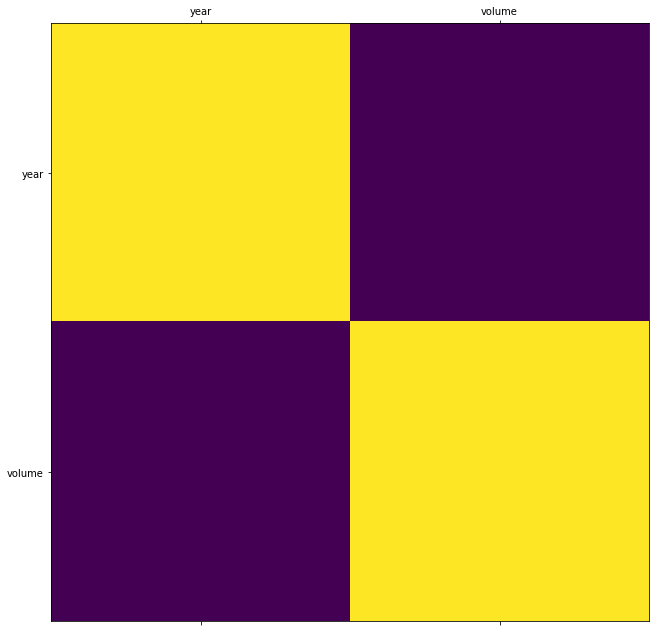

In [23]:
plot_corr(df)

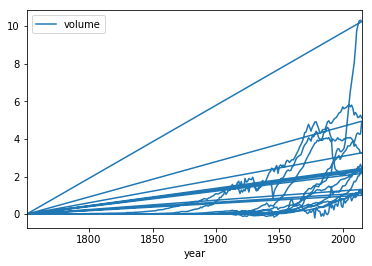

In [24]:
df.plot(x="year", y="volume")

In [42]:
df[["entity","year","volume"]].sort_values("volume", ascending = False)[:20]

,entity,year,volume
1058,China,2014,10.300347
1057,China,2013,10.266399
1059,China,2015,10.232542
1056,China,2012,10.036778
1055,China,2011,9.741501
1054,China,2010,8.783220
1053,China,2009,8.007555
1052,China,2008,7.559249
1051,China,2007,7.036550
1050,China,2006,6.534633


In [26]:
topdf = df[["entity","year","volume"]].sort_values("volume", ascending = False)[:25]

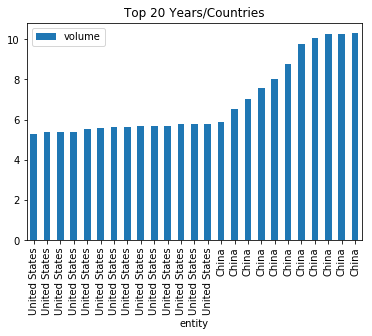

In [45]:
topdf.sort_values("volume", ascending = True).plot(x="entity", y="volume", kind="bar", title="Top 20 Years/Countries")

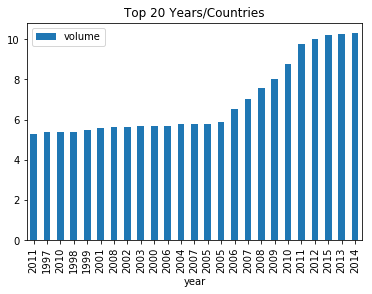

In [52]:
topdf.sort_values("volume", ascending = True).plot.bar(x="year", y="volume", stacked = True, title="Top 20 Years/Countries")

In [28]:
topdf[topdf["entity"] == "China"]

,entity,year,volume
1058,China,2014,10.300347
1057,China,2013,10.266399
1059,China,2015,10.232542
1056,China,2012,10.036778
1055,China,2011,9.741501
1054,China,2010,8.783220
1053,China,2009,8.007555
1052,China,2008,7.559249
1051,China,2007,7.036550
1050,China,2006,6.534633


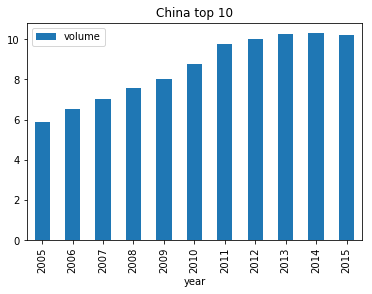

In [29]:
topdf[topdf["entity"] == "China"].sort_values("year", ascending = True).plot(x="year", y="volume", kind = "bar", title="China top 10")

In [30]:
df[["entity","year","volume"]].sort_values("volume", ascending = False).groupby("entity").max()

,year,volume
entity,,
Africa,2015,1.315140
Americas (other),2015,2.374589
Asia and Pacific (other),2015,4.937293
China,2015,10.300347
EU-28,2015,4.405516
Europe (other),2015,4.611828
India,2015,2.278054
International aviation and maritime transport,2015,1.146747
Middle East,2015,2.647512


In [31]:
top2015 = df[["entity","year","volume"]].sort_values("volume", ascending = False).groupby("entity").max()

In [32]:
top2015.describe

<bound method NDFrame.describe of                                                year     volume
entity                                                        
Africa                                         2015   1.315140
Americas (other)                               2015   2.374589
Asia and Pacific (other)                       2015   4.937293
China                                          2015  10.300347
EU-28                                          2015   4.405516
Europe (other)                                 2015   4.611828
India                                          2015   2.278054
International aviation and maritime transport  2015   1.146747
Middle East                                    2015   2.647512
Statistical difference                         2015   1.291253
United States                                  2015   5.794464>

In [33]:
top2015.sort_values("volume", ascending = True).describe

<bound method NDFrame.describe of                                                year     volume
entity                                                        
International aviation and maritime transport  2015   1.146747
Statistical difference                         2015   1.291253
Africa                                         2015   1.315140
India                                          2015   2.278054
Americas (other)                               2015   2.374589
Middle East                                    2015   2.647512
EU-28                                          2015   4.405516
Europe (other)                                 2015   4.611828
Asia and Pacific (other)                       2015   4.937293
United States                                  2015   5.794464
China                                          2015  10.300347>

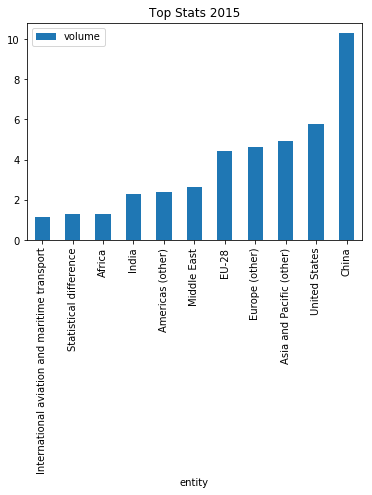

In [35]:
top2015.sort_values("volume", ascending = True).plot.bar(y="volume", title="Top Stats 2015")

In [67]:
df[["entity","year","volume"]].sort_values("volume", ascending = False)[:25]

,entity,year,volume
1058,China,2014,10.300347
1057,China,2013,10.266399
1059,China,2015,10.232542
1056,China,2012,10.036778
1055,China,2011,9.741501
1054,China,2010,8.783220
1053,China,2009,8.007555
1052,China,2008,7.559249
1051,China,2007,7.036550
1050,China,2006,6.534633


In [68]:
most_polluted=df[["entity","year","volume"]].sort_values("volume", ascending = False)[:25]

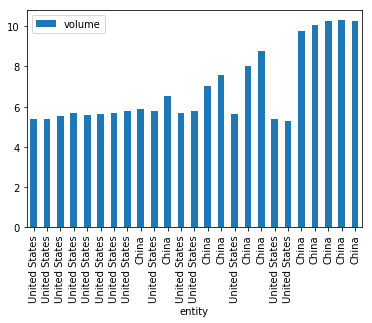

In [137]:
most_polluted.sort_values("year", ascending = True).plot.bar(x = "entity", y="volume", stacked = True)

In [110]:
most_polluted[:5]

,entity,year,volume
1058,China,2014,10.300347
1057,China,2013,10.266399
1059,China,2015,10.232542
1056,China,2012,10.036778
1055,China,2011,9.741501


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000242FD300F28>], dtype=object)

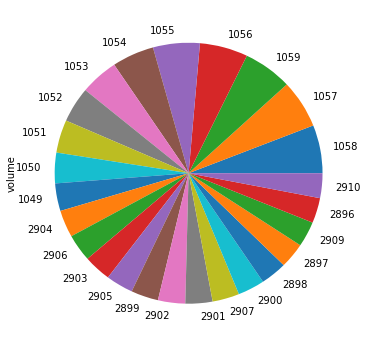

In [141]:
most_polluted["volume"].plot.pie(subplots=True, y="entity", figsize=(6,6), legend=False)